In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data_df = pd.read_csv("data/mouse_drug_data.csv")
clinical_data_df = pd.read_csv("data/clinicaltrial_data.csv")

# Combine the data into a single dataset
mouse_clinical_data_df = pd.merge(clinical_data_df, mouse_data_df, on= "Mouse ID", how="left")

# Display the data table for preview
mouse_clinical_data_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_mouse_clinical = mouse_clinical_data_df.groupby(["Timepoint", "Drug"])
mouse_clinical = mean_mouse_clinical["Tumor Volume (mm3)"].mean()
mouse_clinical
# Convert to DataFrame
Tumor_response_df = pd.DataFrame(mouse_clinical).reset_index()
# Preview DataFrame
Tumor_response_df.head()

,Timepoint,Drug,Tumor Volume (mm3)
0,0,Capomulin,45.0
1,0,Ceftamin,45.0
2,0,Infubinol,45.0
3,0,Ketapril,45.0
4,0,Naftisol,45.0


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
SE_mouse_cli = mouse_clinical_data_df.groupby(["Drug", "Timepoint"])
SE_mouse_clinical = SE_mouse_cli["Tumor Volume (mm3)"].sem()
# Convert to DataFrame
SE_mo_cl = pd.DataFrame(SE_mouse_clinical).reset_index()
SE_mouse_clin = SE_mo_cl.pivot(index = "Timepoint", columns = "Drug")
# Preview DataFrame
SE_mouse_clin.head()


Tumor Volume (mm3)                                          \
Drug               Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   
Timepoint                                                              
0                   0.000000  0.000000  0.000000  0.000000  0.000000   
5                   0.448593  0.164505  0.235102  0.264819  0.202385   
10                  0.702684  0.236144  0.282346  0.357421  0.319415   
15                  0.838617  0.332053  0.357705  0.580268  0.444378   
20                  0.909731  0.359482  0.476210  0.726484  0.595260   

                                                             
Drug        Placebo  Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                                    
0          0.000000  0.000000  0.000000  0.000000  0.000000  
5          0.218091  0.231708  0.482955  0.239862  0.188950  
10         0.402064  0.376195  0.720225  0.433678  0.263949  
15         0.614461  0.466109  0.770432  0.493261  0.370544  
20         0.839609  0.555181  0.786199  0.621889  0.533182

In [4]:
# Minor Data Munging to Re-Format the Data Frames
mouse_clinical_mung = Tumor_response_df.pivot(index = "Timepoint", columns= "Drug")
mouse_clinical_mung.head()
# Preview that Reformatting worked


Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334

In [5]:
mouse_clinical_mung.columns = mouse_clinical_mung.columns.droplevel()
mouse_clinical_mung.columns


Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug')

In [6]:
Tumor_response_df.columns

Index(['Timepoint', 'Drug', 'Tumor Volume (mm3)'], dtype='object')

In [7]:
SE_mouse_clin.columns = SE_mouse_clin.columns.droplevel()
SE_mouse_clin.columns

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug')

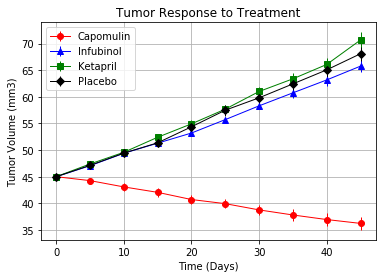

In [8]:
# Generate the Plot (with Error Bars)
#plt.errorbar(Tumor_response_df, mouse_clinical_mung.columns["Capomulin"], yerr=SE_mouse_clin.columns["Capomulin"]) 
#plt.plot(Tumor_response_df.index[0])
#plt.plot(mouse_clinical_mung["Capomulin"])
#plt.plot(SE_mouse_clin["Capomulin"])
plt.errorbar(mouse_clinical_mung.index, mouse_clinical_mung["Capomulin"], yerr=SE_mouse_clin["Capomulin"], linewidth=1, marker="o", color="red")
plt.errorbar(mouse_clinical_mung.index, mouse_clinical_mung["Infubinol"], yerr=SE_mouse_clin["Infubinol"], linewidth=1, marker="^", color="blue")
plt.errorbar(mouse_clinical_mung.index, mouse_clinical_mung["Ketapril"], yerr=SE_mouse_clin["Ketapril"], linewidth=1, marker="s", color="green")
plt.errorbar(mouse_clinical_mung.index, mouse_clinical_mung["Placebo"], yerr=SE_mouse_clin["Placebo"], linewidth=1, marker="D", color="black")
# Save the Figure
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(axis="x")
plt.grid(axis="y")
plt.legend(["Capomulin", "Infubinol", "Ketapril", "Placebo"], loc="best")



In [9]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [10]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met_mouse_clinical = mouse_clinical_data_df.groupby(["Drug", "Timepoint"])
mouse_clinical_met = mean_met_mouse_clinical["Metastatic Sites"].mean()
mouse_clinical_met
# Convert to DataFrame
Metastatic_response_df = pd.DataFrame(mouse_clinical_met).reset_index()
# Preview DataFrame
Metastatic_response_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [11]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
SE_mouse_cli_met = mouse_clinical_data_df.groupby(["Drug", "Timepoint"])
SE_mouse_clinical_met = SE_mouse_cli["Metastatic Sites"].sem()
# Convert to DataFrame
SE_mo_cl_met = pd.DataFrame(SE_mouse_clinical_met).reset_index()
SE_mouse_clin_sites = SE_mo_cl_met.pivot(index = "Timepoint", columns = "Drug")
# Preview DataFrame
SE_mouse_clin_sites.head()

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.074833  0.108588  0.091652  0.098100  0.093618  0.100947   
10                0.125433  0.152177  0.159364  0.142018  0.163577  0.115261   
15                0.132048  0.180625  0.194015  0.191381  0.158651  0.190221   
20                0.161621  0.241034  0.234801  0.236680  0.181731  0.234064   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.095219  0.066332  0.087178  0.077709  
10         0.105690  0.090289  0.123672  0.109109  
15         0.136377  0.115261  0.153439  0.111677  
20         0.171499  0.119430  0.200905  0.166378

In [12]:
SE_mouse_clin_sites.columns = SE_mouse_clin_sites.columns.droplevel()
SE_mouse_clin_sites.columns

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug')

In [13]:
# Minor Data Munging to Re-Format the Data Frames
mouse_clinical_minor_mung = Metastatic_response_df.pivot(index = "Timepoint", columns= "Drug")
mouse_clinical_minor_mung
# Preview that Reformatting worked


Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   
25                0.818182  1.500000  1.277778  1.631579  1.500000  1.941176   
30                1.090909  1.937500  1.588235  2.055556  2.066667  2.266667   
35                1.181818  2.071429  1.666667  2.294118  2.266667  2.642857   
40                1.380952  2.357143  2.100000  2.733333  2.466667  3.166667   
45                1.476190  2.692308  2.111111  3.363636  2.538462  3.272727   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.320000  0.120000  0.240000  0.166667  
10         0.565217  0.250000  0.478261  0.500000  
15         0.764706  0.333333  0.782609  0.809524  
20         1.000000  0.347826  0.952381  1.294118  
25         1.357143  0.652174  1.157895  1.687500  
30         1.615385  0.782609  1.388889  1.933333  
35         2.300000  0.952381  1.562500  2.285714  
40         2.777778  1.100000  1.583333  2.785714  
45         2.571429  1.250000  1.727273  3.071429

In [14]:
mouse_clinical_minor_mung.columns = mouse_clinical_minor_mung.columns.droplevel()
mouse_clinical_minor_mung.columns

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug')

In [15]:
Metastatic_response_df.columns

Index(['Drug', 'Timepoint', 'Metastatic Sites'], dtype='object')

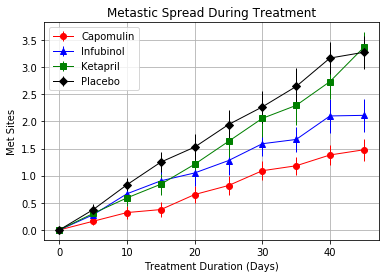

In [16]:
# Generate the Plot (with Error Bars)
plt.errorbar(mouse_clinical_minor_mung.index, mouse_clinical_minor_mung["Capomulin"], yerr=SE_mouse_clin_sites["Capomulin"], linewidth=1, marker="o", color="red")
plt.errorbar(mouse_clinical_minor_mung.index, mouse_clinical_minor_mung["Infubinol"], yerr=SE_mouse_clin_sites["Infubinol"], linewidth=1, marker="^", color="blue")
plt.errorbar(mouse_clinical_minor_mung.index, mouse_clinical_minor_mung["Ketapril"], yerr=SE_mouse_clin_sites["Ketapril"], linewidth=1, marker="s", color="green")
plt.errorbar(mouse_clinical_minor_mung.index, mouse_clinical_minor_mung["Placebo"], yerr=SE_mouse_clin_sites["Placebo"], linewidth=1, marker="D", color="black")
# Save the Figure
plt.title("Metastic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met Sites")
plt.grid(axis="x")
plt.grid(axis="y")
plt.legend(["Capomulin", "Infubinol", "Ketapril", "Placebo"], loc="best")

# Save the Figure

# Show the Figure


## Survival Rates

In [17]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
count_of_mice = mouse_clinical_data_df.groupby(["Drug", "Timepoint"])
mice_count = count_of_mice["Mouse ID"].count()
mice_count
# Convert to DataFrame
mice_count_grouped = pd.DataFrame(mice_count).reset_index()
# Preview DataFrame
mice_count_grouped.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [18]:
# Minor Data Munging to Re-Format the Data Frames
count_mice_mung = mice_count_grouped.pivot(index = "Timepoint", columns= "Drug")
count_mice_mung.head()
# Preview the Data Frame


Mouse ID                                                        \
Drug      Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                   
0                25       25        25       25       25      25       26   
5                25       21        25       23       23      24       25   
10               25       20        21       22       21      24       23   
15               24       19        21       19       21      20       17   
20               23       18        20       19       20      19       17   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
5               25       25        24  
10              24       23        22  
15              24       23        21  
20              23       21        17

In [19]:
count_mice_mung.columns = count_mice_mung.columns.droplevel()
count_mice_mung.columns

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug')

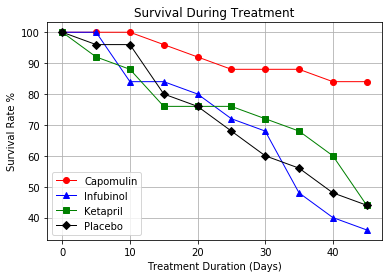

In [20]:
# Generate the Plot (Accounting for percentages)
plt.plot((count_mice_mung["Capomulin"]/25)*100, linewidth=1, marker="o", color="red")
plt.plot((count_mice_mung["Infubinol"]/25)*100, linewidth=1, marker="^", color="blue")
plt.plot((count_mice_mung["Ketapril"]/25)*100, linewidth=1, marker="s", color="green")
plt.plot((count_mice_mung["Placebo"]/25)*100, linewidth=1, marker="D", color="black")


plt.title("Survival During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Survival Rate %")
plt.grid(axis="x")
plt.grid(axis="y")
plt.legend(["Capomulin", "Infubinol", "Ketapril", "Placebo"], loc="best")

# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [21]:
# Calculate the percent changes for each drug
drug_per_change = (mouse_clinical_mung.iloc[-1] - mouse_clinical_mung.iloc[0]) / (mouse_clinical_mung.iloc[0])*100
drug_per_change
# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

Text(0, 0.5, '% Tumor Volume Change')

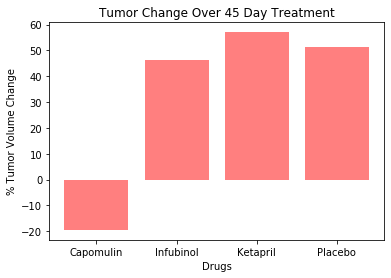

In [22]:
drug_per_ch = [drug_per_change.iloc[0], drug_per_change.iloc[2], drug_per_change.iloc[3], drug_per_change.iloc[5]]
plt.bar(["Capomulin", "Infubinol", "Ketapril", "Placebo"], drug_per_ch, color='r', alpha=0.5)
plt.xlim()
plt.title("Tumor Change Over 45 Day Treatment")
plt.xlabel("Drugs")
plt.ylabel("% Tumor Volume Change")

In [23]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

NameError: name 'fig' is not defined